In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

C:\Users\Joe Vogel\AppData\Local\Temp\ipykernel_4892\2033994732.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:

csv_file = '../results/OPENAI_ES-07_04-16_56/7_0/all_results.csv'

df = pd.read_csv(csv_file)

# Remove colunas desnecessárias
df = df.drop(['Strength', 'Strength_Min', 'Cavitation', 'Cavitation_Max', 'Tip_Velocity', 'Tip_Velocity_Max'], axis=1)

# Formata os dados
df = df.astype({"P_B": float, "Valid": bool, "Run": int, "Generation": int})

df = df[df['Valid'] == True]

# Obtém as 10 melhores soluções
df = df.sort_values(by='P_B')
df = df.iloc[:10]


In [3]:
df

,V_S,Z,D,AEdAO,PdD,P_B,Generation,Run,Valid
5889,7.0,5,0.800000,0.597571,0.608341,81.730597,8,9,True
4564,7.0,5,0.800000,0.786627,0.778443,82.629797,13,0,True
6011,7.0,6,0.800000,0.852947,0.779372,82.691278,3,0,True
6907,7.0,6,0.800000,0.892066,0.753900,82.929037,2,6,True
6002,7.0,6,0.800000,0.822130,0.872322,83.302365,1,0,True
7542,7.0,7,0.800000,0.813461,0.829065,83.421290,9,0,True
4514,7.0,5,0.800000,0.909094,0.685737,83.499469,3,0,True
6001,7.0,6,0.793210,0.849977,0.821067,83.509101,1,0,True
4376,7.0,4,0.785012,0.643967,0.653426,83.590963,6,9,True
4504,7.0,5,0.800000,0.906904,0.807717,83.705575,1,0,True


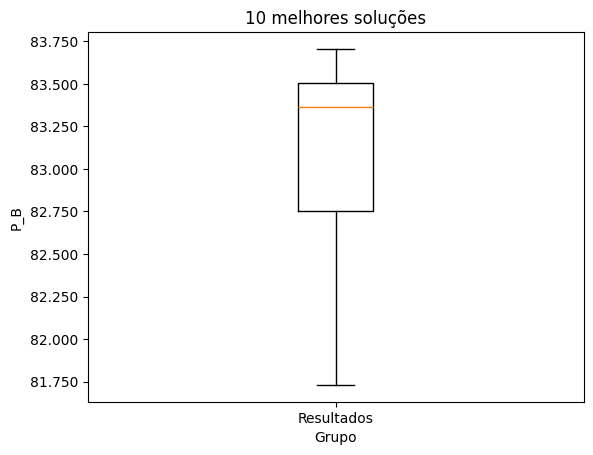

In [5]:
data = [df['P_B']]

plt.boxplot(data, labels=['Resultados'])

# Formatar o eixo y para exibir três casas antes da vírgula e duas casas decimais
formatter = ticker.FuncFormatter(lambda x, pos: f'{x:,.3f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Definir o título e os rótulos dos eixos
plt.title('10 melhores soluções')
plt.xlabel('Grupo')
plt.ylabel('P_B')

plt.show()